In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 1. Load the tips dataset from either pydataset or seaborn.

In [2]:
from pydataset import data

In [3]:
tips = data('tips')
tips.head(1)

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2


In [4]:
#no null values
tips.shape

(244, 7)

### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

Here is some sample code to get you started:

In [5]:
X = tips[['total_bill']]
y = tips['tip']

In [6]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(normalize=True)
# assuming X and y are already defined
model = lm.fit(tips[['total_bill']], tips['tip'])
predictions = model.predict(X)

Modify and add to the code above as necessary for it to work with the tips dataset.

In [7]:
# make prediction
tips['yhat'] = lm.predict(X)
tips['baseline'] = tips.tip.mean()
tips

,total_bill,tip,sex,smoker,day,time,size,yhat,baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,2.998279
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,2.998279
...,...,...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3,3.969131,2.998279
241,27.18,2.00,Female,Yes,Sat,Dinner,2,3.774836,2.998279
242,22.67,2.00,Male,Yes,Sat,Dinner,2,3.301175,2.998279
243,17.82,1.75,Male,No,Sat,Dinner,2,2.791807,2.998279


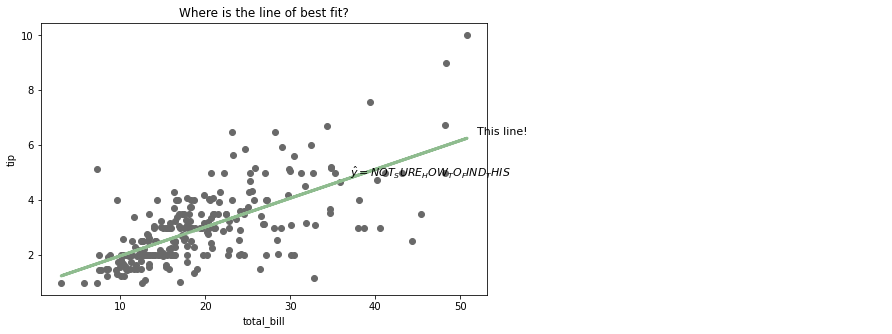

In [8]:
# devaluation_example2(tips, X, y):
plt.figure(figsize=(8, 5))

# Plot regression line
plt.plot(X, tips.yhat, color='darkseagreen',linewidth=3)
# add label to the regression line
plt.annotate('', xy=(55,5), xytext=(55,3), xycoords='data', textcoords='data', arrowprops={'arrowstyle': '<-', 'color': 'black'})
plt.text(56,5,  r'$\hat{y}=NOT_SURE_HOW_TO_FIND_THIS$', {'color': 'black', 'fontsize': 11, 'ha': 'right', 'va': 'center'})
plt.text(52,6.5,  'This line!', {'color': 'black', 'fontsize': 11, 'ha': 'left', 'va': 'center'})

# Plot the data points
plt.scatter(X, y, color='dimgray')

# add title
title_string = 'Where is the line of best fit?'
plt.title(title_string, fontsize=12, color='black')

# add axes labels
plt.ylabel('tip')
plt.xlabel('total_bill')

# add baseline
plt.annotate('', xy=(70, y.mean()), xytext=(100, y.mean()), xycoords='data', textcoords='data', arrowprops={'arrowstyle': '-', 'color': 'darkseagreen'})

plt.show()

### Does the scatterplot seem a little heteroscedastic? Is this a problem?
### From wikipedia:
- One of the assumptions of the classical linear regression model is that there is no heteroscedasticity. Breaking this assumption means that the Gauss–Markov theorem does not apply, meaning that OLS estimators are not the Best Linear Unbiased Estimators (BLUE) and their variance is not the lowest of all other unbiased estimators.

### 3. Plot the residuals for the linear regression model that you made.

In [9]:
# residual = actual - predicted
tips['residual'] = tips.tip - tips.yhat
tips['baseline_residual'] = tips.tip - tips.baseline
tips

,total_bill,tip,sex,smoker,day,time,size,yhat,baseline,residual,baseline_residual
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279,-1.694636,-1.988279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279,-0.346223,-1.338279
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279,0.373165,0.501721
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,2.998279,-0.097250,0.311721
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,2.998279,0.107178,0.611721
...,...,...,...,...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3,3.969131,2.998279,1.950869,2.921721
241,27.18,2.00,Female,Yes,Sat,Dinner,2,3.774836,2.998279,-1.774836,-0.998279
242,22.67,2.00,Male,Yes,Sat,Dinner,2,3.301175,2.998279,-1.301175,-0.998279
243,17.82,1.75,Male,No,Sat,Dinner,2,2.791807,2.998279,-1.041807,-1.248279


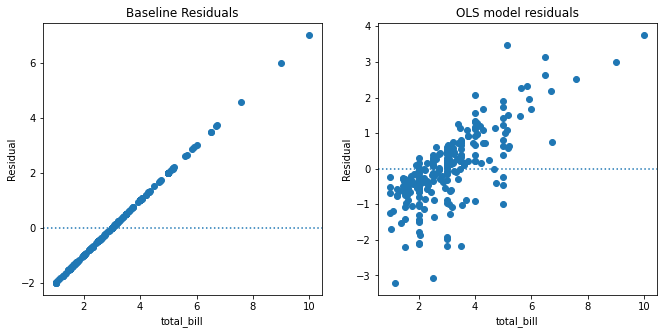

In [10]:
# residual plots (x vs residual)

plt.figure(figsize = (11,5))

plt.subplot(121)
plt.scatter(tips.tip, tips.baseline_residual)
plt.axhline(y = 0, ls = ':')
plt.xlabel('total_bill')
plt.ylabel('Residual')
plt.title('Baseline Residuals')

plt.subplot(122)
plt.scatter(tips.tip, tips.residual)
plt.axhline(y = 0, ls = ':')
plt.xlabel('total_bill')
plt.ylabel('Residual')
plt.title('OLS model residuals');

## Notice how the OLS model residuals kind of follow a trend line--reinforcing the idea that the OLS model is not the best model for this data

### 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [11]:
# first calculate the square of residuals

tips['residual^2'] = tips.residual**2
tips['baseline_residual^2'] = tips.baseline_residual**2

tips.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,baseline,residual,baseline_residual,residual^2,baseline_residual^2
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279,-1.694636,-1.988279,2.871792,3.953252
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279,-0.346223,-1.338279,0.119870,1.790990
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279,0.373165,0.501721,0.139252,0.251724
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,2.998279,-0.097250,0.311721,0.009458,0.097170
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,2.998279,0.107178,0.611721,0.011487,0.374203


In [12]:
SSE = tips['residual^2'].sum()
SSE_baseline = tips['baseline_residual^2'].sum()

print('SSE =', "{:.1f}".format(SSE))
print("SSE Baseline =", "{:.1f}".format(SSE_baseline))

SSE = 252.8
SSE Baseline = 465.2


In [13]:
MSE = SSE/len(tips)
MSE_baseline = SSE_baseline/len(tips)

print("MSE = ", "{:.1f}".format(MSE))
print("MSE baseline = ", "{:.1f}".format(MSE_baseline))

MSE =  1.0
MSE baseline =  1.9


In [14]:
from math import sqrt
RMSE = sqrt(MSE)
RMSE_baseline =  sqrt(MSE_baseline)


print("RMSE = ", "{:.1f}".format(RMSE))
print("RMSE baseline = ", "{:.1f}".format(RMSE_baseline))

RMSE =  1.0
RMSE baseline =  1.4


In [15]:
# All together, now (as copied from curriculum):
df_eval = pd.DataFrame(np.array(['SSE','MSE','RMSE']), columns=['metric'])
df_baseline_eval = pd.DataFrame(np.array(['SSE_baseline','MSE_baseline','RMSE_baseline']), columns=['metric'])

df_eval['model_error'] = np.array([SSE, MSE, RMSE])
df_baseline_eval['model_error'] = np.array([SSE_baseline, MSE_baseline, RMSE_baseline])

print(df_eval)
print(df_baseline_eval)

  metric  model_error
0    SSE   252.788744
1    MSE     1.036019
2   RMSE     1.017850
          metric  model_error
0   SSE_baseline   465.212477
1   MSE_baseline     1.906609
2  RMSE_baseline     1.380800


In [16]:
df_eval['error_delta'] = df_eval.model_error - df_baseline_eval.model_error
df_eval

,metric,model_error,error_delta
0,SSE,252.788744,-212.423733
1,MSE,1.036019,-0.870589
2,RMSE,1.017850,-0.362950


In [17]:
# calculate R2 manually:

# Total Sum of Squares = SSE for baseline
TSS = SSE_baseline =   tips['baseline_residual^2'].sum()

# Sum of squared error for the regression line (Unexplained error)
SSE = tips['residual^2'].sum()

# ESS - Explained sum of squares ('Explained Error')
ESS = TSS - SSE

# Calculate R2
R2 = ESS/TSS
R2

0.45661658635167646

In [18]:
# Note this tasty boolean mask:
SSE = df_eval[df_eval.metric=='SSE']['model_error']
TSS = ESS + SSE
print("ESS = ", ESS)
print("SSE = ", SSE[0])
print("TSS = ", TSS[0])

ESS =  212.4237331984044
SSE =  252.788743850776
TSS =  465.2124770491804


### 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [19]:
# See code in question 4 for how i got this:
print(df_baseline_eval)

          metric  model_error
0   SSE_baseline   465.212477
1   MSE_baseline     1.906609
2  RMSE_baseline     1.380800


### 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [20]:
SSE[0]

252.788743850776

In [21]:
print('SSE = ', SSE[0])
print('SSE Baseline = ', SSE_baseline)
if SSE[0] < SSE_baseline:
    print('OLS model beats baseline model')

SSE =  252.788743850776
SSE Baseline =  465.2124770491804
OLS model beats baseline model


### 7. What is the amount of variance explained in your model?

In [22]:
# R**2, which is the Explained Sum of Squares / Total Sum of Squares:

R2 = ESS/TSS
R2

0    0.456617
Name: model_error, dtype: float64

In [23]:
# or...
from sklearn.metrics import r2_score
r2_score(tips.tip, tips.yhat)

0.45661658635167657

### 8. Is your model better than the baseline model?

In [24]:
# $R^2$ = ESS/TSS

# $R^2$ = 1 - SSE/TSS  (since ESS + SSE = TSS)

# *Note: TSS == SSE for baseline model (mean model)*


# In other words, R2 for baseline should be 0, and is:

r2_score(tips.baseline, tips.yhat)

0.0

### 9. Create a file named evaluate.py that contains the following functions.

- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
- sum of squared errors (SSE)
- explained sum of squares (ESS)
- total sum of squares (TSS)
- mean squared error (MSE)
- root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [25]:
import evaluate

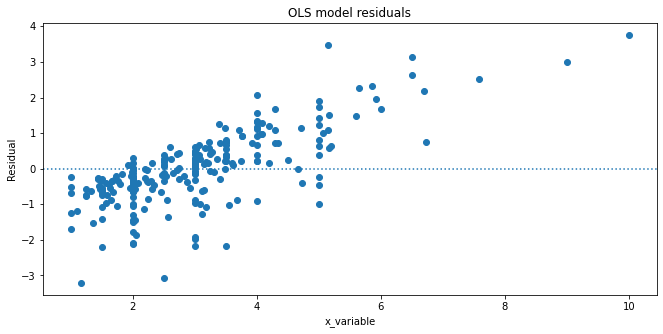

In [26]:
evaluate.plot_residuals(tips.tip,tips.yhat)

In [27]:
evaluate.regression_errors(tips.tip,tips.yhat)

SSE =  252.8
SSE Baseline =  465.2
ESS =  212.4
TSS =  465.2
MSE =  1.0
MSE Baseline =  1.9
RMSE =  1.0
RMSE Baseline =  1.4


In [28]:
evaluate.better_than_baseline(tips.tip,tips.yhat)

The regression model outperforms baseline


### 10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.